# Demo Básico: Sistema de Neuromodulación Endocrina

**Notebook:** Introducción y ejemplos básicos  
**Versión:** 1.0  
**Fecha:** Enero 2025

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Nicolakorff/tfm-endocrine-llm/blob/main/examples/01_demo_basico.ipynb)

---

Este notebook demuestra el uso básico del sistema de neuromodulación endocrina para LLMs.

**Contenido:**
1. Instalación
2. Generación básica con perfiles hormonales
3. Comparación de perfiles
4. Creación de perfiles personalizados
5. Análisis de métricas

## 1. Instalación

Instala el paquete desde GitHub (versión más reciente):

In [ ]:
import os

# Verificar si estamos en Colab
is_colab = 'COLAB_RELEASE_TAG' in os.environ

if is_colab:
    print("Configurando Google Colab...")
    # Limpiar cache completo
    !rm -rf ~/.cache/huggingface/
    
    # Actualizar numpy a versión 2.0+ (requerida por muchos paquetes)
    !pip install --upgrade --no-cache-dir -q 'numpy>=2.0.0'
    
    # Reinstalar transformers limpiamente
    !pip install --upgrade --no-cache-dir -q transformers
    print("Cache limpiado, numpy y transformers actualizados")

# Instalar paquete
!pip install --no-cache-dir -q git+https://github.com/Nicolakorff/tfm-endocrine-llm.git@v0.5.0

import endocrine_llm
print(f"✓ Versión instalada: {endocrine_llm.__version__}")

Versión instalada: 0.4.0


## 2. Imports y Configuración

In [9]:
from endocrine_llm import EndocrineModulatedLLM, HORMONE_PROFILES, HormoneProfile
from endocrine_llm import TextMetrics
import warnings
warnings.filterwarnings('ignore')

# Inicializar modelo (distilgpt2 es más rápido)
print("Cargando modelo...")
print("(Esto puede tardar 1-2 minutos en la primera carga)")

try:
    model = EndocrineModulatedLLM("distilgpt2")
except Exception as e:
    print(f"Error: {e}")
    print("\nIntentando reinstalar transformers...")
    import subprocess
    subprocess.run(["pip", "install", "--upgrade", "--no-cache-dir", "-q", "transformers"], check=False)
    
    print("Intentando nuevamente...")
    model = EndocrineModulatedLLM("distilgpt2")

print(f"Modelo cargado en: {model.device}")

Cargando modelo...
(Esto puede tardar 1-2 minutos en la primera carga)
Inicializando EndocrineModulatedLLM
Modelo: distilgpt2
   Dispositivo: cpu
Sistema inicializado
Parámetros: 81.9M
Tokens empáticos: 34
Modelo cargado en: cpu


## 3. Generación Básica

Genera texto con un perfil hormonal predefinido:

In [3]:
prompt = "I'm feeling anxious about my presentation tomorrow."

# Generar con perfil empático
texts = model.generate_with_hormones(
    prompt=prompt,
    hormone_profile=HORMONE_PROFILES["empathic"],
    max_new_tokens=50,
    num_return_sequences=1
)

print("="*70)
print("PERFIL: EMPATHIC")
print("="*70)
print(f"Prompt: {prompt}")
print(f"\nGeneración: {texts[0]}")
print("="*70)

PERFIL: EMPATHIC
Prompt: I'm feeling anxious about my presentation tomorrow.

Generación: I'm feeling anxious about my presentation tomorrow.

She's trying for a bit more of a kick for me.


## 4. Comparación de Perfiles

Compara cómo diferentes perfiles hormonales afectan la generación:

In [4]:
prompt = "The future of artificial intelligence is"

# Perfiles a comparar
profiles_to_test = ["baseline", "creative", "cautious", "empathic"]

print("\n" + "="*70)
print(f"PROMPT: {prompt}")
print("="*70)

for profile_name in profiles_to_test:
    texts = model.generate_with_hormones(
        prompt=prompt,
        hormone_profile=HORMONE_PROFILES[profile_name],
        max_new_tokens=40,
        num_return_sequences=1
    )

    print(f"\n[{profile_name.upper()}]")
    print(f"{texts[0]}")
    print("-"*70)


PROMPT: The future of artificial intelligence is

[BASELINE]
The future of artificial intelligence is still unclear, especially not in terms of how it will function, or whether it will function without AI for much longer.








In addition to the data set from
----------------------------------------------------------------------

[CREATIVE]
The future of artificial intelligence is likely to become more clear on a host of problems facing humans. And the threat against our human future lies at a crossroads with artificial intelligence that, while it will be able to mitigate these challenges before
----------------------------------------------------------------------

[CAUTIOUS]
The future of artificial intelligence is under way, not only for the general public, but for the company itself."


The company has already received nearly $40 million from the International Monetary Fund for financing a $12 billion,
----------------------------------------------------------------------

[EMP

## 5. Crear Perfil Personalizado

Crea tu propio perfil hormonal con valores específicos:

In [5]:
# Perfil personalizado: Muy creativo pero cauteloso
my_profile = HormoneProfile(
    dopamine=0.9,    # Alta creatividad
    cortisol=0.7,    # Alta cautela
    oxytocin=0.5,    # Empatía neutral
    adrenaline=0.6,  # Moderada intensidad
    serotonin=0.6    # Moderada estabilidad
)

print("Perfil personalizado creado:")
print(my_profile.to_dict())

# Generar con perfil custom
texts = model.generate_with_hormones(
    "Write a story about",
    my_profile,
    max_new_tokens=60
)

print("\n" + "="*70)
print("GENERACIÓN CON PERFIL PERSONALIZADO:")
print("="*70)
print(texts[0])

Perfil personalizado creado:
{'dopamine': 0.9, 'cortisol': 0.7, 'oxytocin': 0.5, 'adrenaline': 0.6, 'serotonin': 0.6, 'dynamic': False, 'learning_rate': 0.1}

GENERACIÓN CON PERFIL PERSONALIZADO:
Write a story about how it makes money out of the state. That is right. But to do that is going to be a very complex and convoluted way, and to use very complex logic to get to that point. There were a lot of questions. But they all came out very quickly with the facts – you don


## 6. Análisis de Métricas

Calcula métricas de calidad del texto generado:

In [6]:
# Generar texto
texts = model.generate_with_hormones(
    "I need help with my problem.",
    HORMONE_PROFILES["empathic"],
    max_new_tokens=50
)

generated_text = texts[0]

# Calcular métricas
metrics = TextMetrics.compute_all(generated_text)

print("="*70)
print("TEXTO GENERADO:")
print("="*70)
print(generated_text)
print("\n" + "="*70)
print("MÉTRICAS DE CALIDAD:")
print("="*70)

for metric_name, value in metrics.items():
    print(f"  {metric_name:25s}: {value:.4f}")

TEXTO GENERADO:
I need help with my problem. It is very difficult to explain or care about the other side of a game. You need help explaining and care so you can get better through reading it.
We love and support people who don't understand how things happen. Your love for each and

MÉTRICAS DE CALIDAD:
  length                   : 51.0000
  distinct_1               : 0.8627
  distinct_2               : 0.9800
  distinct_3               : 1.0000
  repetition_rate          : 0.0000
  sentiment_polarity       : 0.0542
  sentiment_subjectivity   : 0.5792


## 7. Múltiples Generaciones

Genera múltiples variantes para ver la diversidad:

In [7]:
prompt = "Tell me about"

# Generar 5 variantes
texts = model.generate_with_hormones(
    prompt,
    HORMONE_PROFILES["creative"],
    max_new_tokens=40,
    num_return_sequences=5
)

print("="*70)
print("5 VARIANTES CON PERFIL CREATIVO")
print("="*70)

for i, text in enumerate(texts, 1):
    print(f"\n[Variante {i}]")
    print(text)
    print("-"*70)

5 VARIANTES CON PERFIL CREATIVO

[Variante 1]
Tell me about what we know to be true, and also of those that have little to no understanding or experience," she said.




"No one is sure this book is worth reading, but
----------------------------------------------------------------------

[Variante 2]
Tell me about his relationship? I'm quite sure that his daughter went outside. We have known him from previous occasions. We're always looking to get more information and to get the most out of what we're doing
----------------------------------------------------------------------

[Variante 3]
Tell me about you and other people... But your relationship with me and others will have grown increasingly intimate and more meaningful, in comparison to your own. I am so proud of how people are treated to me, and
----------------------------------------------------------------------

[Variante 4]
Tell me about the first time in a year or two that this guy (Dennis O’Brien) showed up in San Franci

## 8. Ver Todos los Perfiles Disponibles


PERFILES HORMONALES PREDEFINIDOS:
        Profile  dopamine  cortisol  oxytocin  adrenaline  serotonin  dynamic  learning_rate
       baseline       0.5       0.5       0.5         0.5        0.5    False            0.1
  high_dopamine       0.9       0.5       0.5         0.5        0.5    False            0.1
  high_cortisol       0.5       0.9       0.5         0.5        0.5    False            0.1
  high_oxytocin       0.5       0.5       0.9         0.5        0.5    False            0.1
high_adrenaline       0.5       0.5       0.5         0.9        0.5    False            0.1
 high_serotonin       0.5       0.5       0.5         0.5        0.9    False            0.1
       euphoric       0.9       0.2       0.6         0.5        0.8    False            0.1
       stressed       0.3       0.9       0.4         0.8        0.3    False            0.1
       empathic       0.6       0.4       0.9         0.4        0.7    False            0.1
       cautious       0.3       0.8

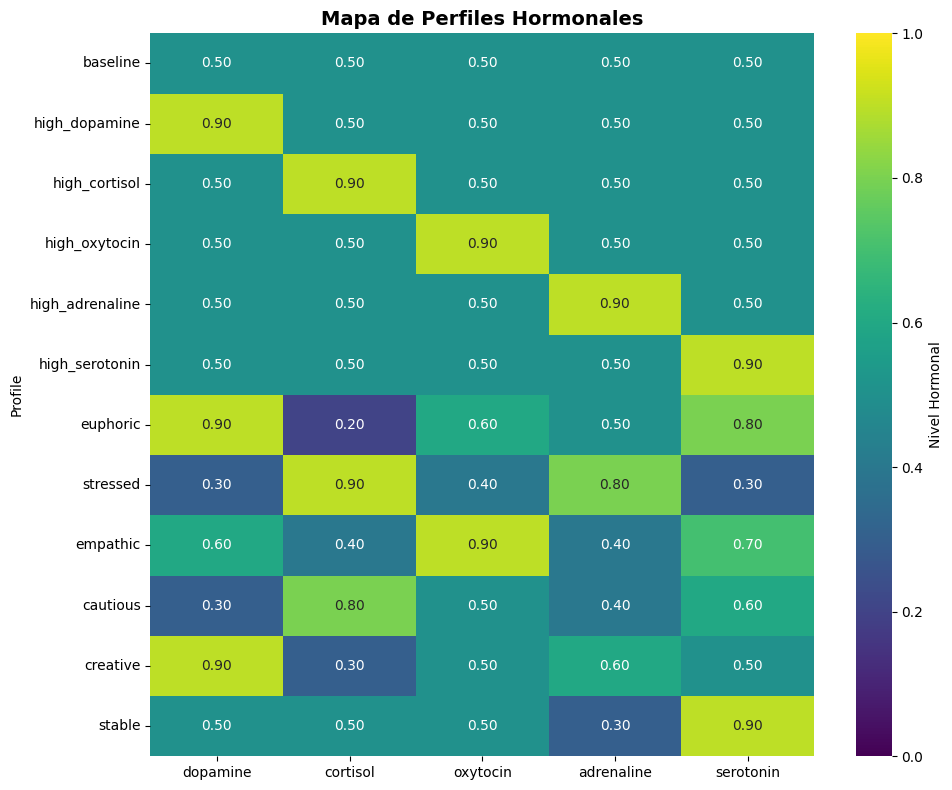

In [8]:
import pandas as pd

# Extraer datos de perfiles
profile_data = []
for name, profile in HORMONE_PROFILES.items():
    if not profile.dynamic:  # Solo perfiles estáticos
        profile_data.append({
            'Profile': name,
            **profile.to_dict()
        })

df_profiles = pd.DataFrame(profile_data)

print("\nPERFILES HORMONALES PREDEFINIDOS:")
print("="*70)
print(df_profiles.to_string(index=False))

# Visualizar como heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(
    df_profiles.set_index('Profile')[['dopamine', 'cortisol', 'oxytocin', 'adrenaline', 'serotonin']],
    annot=True,
    fmt='.2f',
    cmap='viridis',
    vmin=0,
    vmax=1,
    cbar_kws={'label': 'Nivel Hormonal'}
)
plt.title('Mapa de Perfiles Hormonales', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

##9. Conclusión

- Instalar el sistema  
- Generar texto con perfiles hormonales  - Comparar diferentes perfiles  
- Crear perfiles personalizados  
- Calcular métricas de calidad  

### Próximos Pasos

- **Notebook 02:** Sistema dinámico (hormonas que se adaptan)
- **Notebook 03:** Sesgos semánticos (basados en embeddings)